# Basics of map algebra

Brendan Harmon  
2025-06-18

<figure>
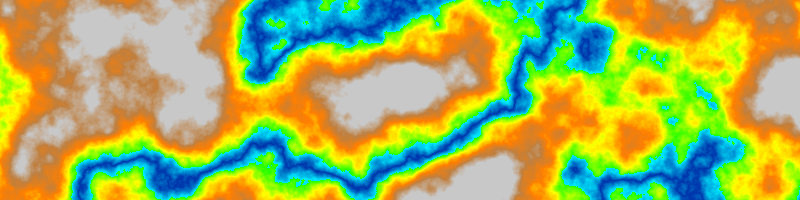
<figcaption aria-hidden="true">Terrain modeled with map
algebra</figcaption>
</figure>

> **Computational notebook**
>
> This tutorial can be run as a [computational
> notebook](https://grass-tutorials.osgeo.org/content/tutorials/map_algebra/basic_map_algebra.ipynb).
> Learn how to work with notebooks with the tutorial [Get started with
> GRASS & Python in Jupyter
> Notebooks](../get_started/fast_track_grass_and_python.qmd).

# Introduction

This tutorial is a gentle introduction to the basics of map algebra in
GRASS. You will begin to learn how to think procedurally about space
using math, logic, and flow control. Map algebra is an algebraic
approach to modeling fields of data such as rasters. It can be used to
create, summarize, transform, or combine multiple rasters. Algebraic
operations on raster maps can be classified as local, focal, zonal, or
global. Local operations act on each raster cell in isolation. Focal
operations act on a neighborhood around each cell. Zonal operations act
on groups of cells. Global operations act on all cells in the raster.
While there are many tools for map algebra in GRASS, this tutorial
focuses on local algebraic operations using the raster map calculator
[r.mapcalc](https://grass.osgeo.org/grass-stable/manuals/r.mapcalc.html).
It also briefly introduces focal operations with
[r.neighbors](https://grass.osgeo.org/grass-stable/manuals/r.neighbors.html),
zonal operations using conditional statements with
[r.mapcalc](https://grass.osgeo.org/grass-stable/manuals/r.mapcalc.html),
and global operations with
[r.info](https://grass.osgeo.org/grass-stable/manuals/r.info.html).

<table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<tbody>
<tr>
<td style="text-align: center;"><div width="100.0%"
data-layout-align="center">
<table>
<colgroup>
<col style="width: 4%" />
<col style="width: 18%" />
<col style="width: 76%" />
</colgroup>
<thead>
<tr>
<th>Types</th>
<th>Scope</th>
<th>Tools</th>
</tr>
</thead>
<tbody>
<tr>
<td>Local</td>
<td>Each cell individually</td>
<td><a
href="https://grass.osgeo.org/grass-stable/manuals/r.mapcalc.html">r.mapcalc</a>,
<a
href="https://grass.osgeo.org/grass-stable/manuals/r.mapcalc.simple.html">r.mapcalc.simple</a>,
<a
href="https://grass.osgeo.org/grass-stable/manuals/r.series.html">r.series</a>,
etc…</td>
</tr>
<tr>
<td>Focal</td>
<td>Each cell and its neighborhood</td>
<td><a
href="https://grass.osgeo.org/grass-stable/manuals/r.mapcalc.html">r.mapcalc</a>,
<a
href="https://grass.osgeo.org/grass-stable/manuals/r.neighbors.html">r.neighbors</a>,
<a
href="https://grass.osgeo.org/grass-stable/manuals/r.mfilter.html">r.mfilter</a>,
etc…</td>
</tr>
<tr>
<td>Zonal</td>
<td>Groups of cells</td>
<td><a
href="https://grass.osgeo.org/grass-stable/manuals/r.mapcalc.html">r.mapcalc</a>,
<a
href="https://grass.osgeo.org/grass-stable/manuals/r.clump.html">r.clump</a>,
<a
href="https://grass.osgeo.org/grass-stable/manuals/r.univar.html">r.univar</a>,
<a
href="https://grass.osgeo.org/grass-stable/manuals/r.stats.zonal.html">r.stats.zonal</a>,
etc…</td>
</tr>
<tr>
<td>Global</td>
<td>All cells</td>
<td><a
href="https://grass.osgeo.org/grass-stable/manuals/r.info.html">r.info</a>,
<a
href="https://grass.osgeo.org/grass-stable/manuals/r.univar.html">r.univar</a>,
<a
href="https://grass.osgeo.org/grass-stable/manuals/r.stats.html">r.stats</a>,
<a
href="https://grass.osgeo.org/grass-stable/manuals/r.report.html">r.report</a>,
etc…</td>
</tr>
</tbody>
</table>
</div></td>
</tr>
</tbody>
</table>

Table 1: Types of map algebra operations

## Raster Calculator

The raster map calculator
[r.mapcalc](https://grass.osgeo.org/grass-stable/manuals/r.mapcalc.html)
uses map algebra expressions to transform rasters. The left side of the
expression is the output raster map, while the right side is the input
syntax including rasters, operators, functions, and variables. The
raster map calculator can be run from the graphical user interface
(GUI), from the command line, or with Python.

The raster calculator can be used for the simplest of tasks such as
copying rasters, creating constant rasters, scaling rasters, patching
rasters together, or adding rasters together. It can also be used for
more sophisticated tasks such as normalizing rasters, processing
imagery, calculating vegetation indices, implementing mathematical
models, and generating synthetic data. In this tutorial, we will use map
algebra to generate terrain with mountains, valleys, weathering, forest,
plateaus, and rivers. We will use the following operators, functions,
and internal variables:

<table style="width:100%;">
<colgroup>
<col style="width: 33%" />
<col style="width: 33%" />
<col style="width: 33%" />
</colgroup>
<tbody>
<tr>
<td style="text-align: center;"><div width="33.3%"
data-layout-align="center">
<table>
<thead>
<tr>
<th>Operator</th>
<th>Syntax</th>
</tr>
</thead>
<tbody>
<tr>
<td>Addition</td>
<td><code>+</code></td>
</tr>
<tr>
<td>Division</td>
<td><code>\</code></td>
</tr>
<tr>
<td>Greater than</td>
<td><code>&gt;</code></td>
</tr>
<tr>
<td>Less than</td>
<td><code>&lt;</code></td>
</tr>
</tbody>
</table>
</div></td>
<td style="text-align: center;"><div width="33.3%"
data-layout-align="center">
<table>
<thead>
<tr>
<th>Function</th>
<th>Syntax</th>
</tr>
</thead>
<tbody>
<tr>
<td>Absolute value</td>
<td><code>abs(x)</code></td>
</tr>
<tr>
<td>Random</td>
<td><code>rand(a,b)</code></td>
</tr>
<tr>
<td>If</td>
<td><code>if(x)</code></td>
</tr>
<tr>
<td>If then else</td>
<td><code>if(x,a,b)</code></td>
</tr>
</tbody>
</table>
</div></td>
<td style="text-align: center;"><div width="33.3%"
data-layout-align="center">
<table>
<thead>
<tr>
<th>Variable</th>
<th>Syntax</th>
</tr>
</thead>
<tbody>
<tr>
<td>Null</td>
<td><code>null()</code></td>
</tr>
</tbody>
</table>
</div></td>
</tr>
</tbody>
</table>

Table 2: Map algebra operators, functions, and variables in this
tutorial

# Setup

Start a GRASS session in a new project with a Cartesian (XY) coordinate
system. Use
[g.region](https://grass.osgeo.org/grass-stable/manuals/g.region.html)
to set the extent and resolution of the computational region. Since we
are working in a Cartesian coordinate system, we can simply create a
region starting at the origin and extending two hundred units north and
eight hundred units east.

In [1]:
# Import libraries
import os
import sys
import subprocess
from pathlib import Path

# Find GRASS Python packages
sys.path.append(
  subprocess.check_output(
    ["grass", "--config", "python_path"],
    text=True
    ).strip()
  )

# Import GRASS packages
import grass.script as gs
import grass.jupyter as gj

# Create a temporary folder
import tempfile
temporary = tempfile.TemporaryDirectory()

# Create a project in the temporary directory
gs.create_project(path=temporary.name, name="xy")

# Start GRASS in this project
session = gj.init(Path(temporary.name, "xy"))

# Set region
gs.run_command("g.region", n=200, e=800, s=0, w=0, res=1)

# Constants

We will be modeling a landscape, so let’s start with the simplest of
landforms - a flat plain. We can represent a flat plain with a constant
raster that has the same elevation value for every cell. It is very easy
to create constant rasters like this with map algebra. We will use the
raster map calculator
[r.mapcalc](https://grass.osgeo.org/grass-stable/manuals/r.mapcalc.html)
to create a new raster with a constant value of zero, representing flat
terrain at mean sea level. In the raster map calculator, simply write
the expression `elevation=0` to create a new elevation raster set to a
constant height of zero.

In [2]:
# Map algebra
gs.mapcalc("elevation = 0")

# Visualize
m = gj.Map(width=800)
m.d_rast(map="elevation")
m.show()

<figure>
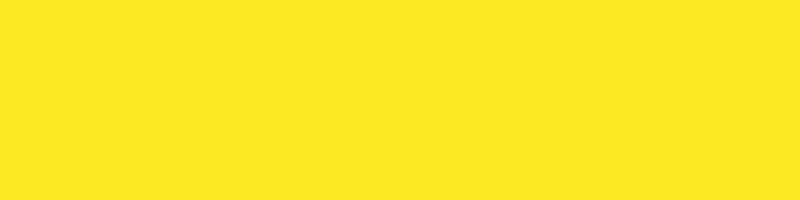
<figcaption aria-hidden="true">Plains</figcaption>
</figure>

# Fractals

Now let’s model more interesting mountainous terrain as a base for the
rest of the tutorial. Use
[r.surf.fractal](https://grass.osgeo.org/grass-stable/manuals/r.surf.fractal.html)
to generate a fractal surface that simulates mountainous terrain. If you
want reproducible results, set a seed. Find the height of the mountains
by printing the elevation range with
[r.info](https://grass.osgeo.org/grass-stable/manuals/r.info.html). This
report is an example of a global map algebra operation that acts on the
entire raster.

In [3]:
# Generate fractal surface
gs.run_command("r.surf.fractal", output="fractal", dimension=2.25)

# Visualize
m.d_rast(map="fractal")
m.d_legend(raster="fractal", at=(5, 95, 1, 3))
m.show()

# Print range
info = gs.read_command("r.info", map="fractal", flags="r")
print(info)

<figure>
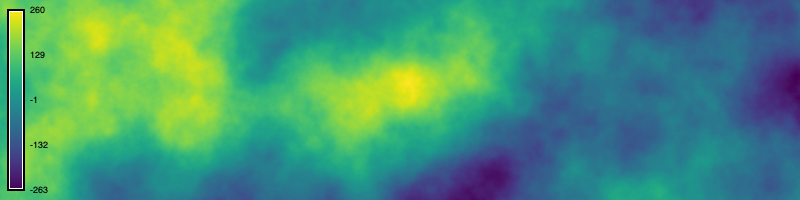
<figcaption aria-hidden="true">Fractal</figcaption>
</figure>

# Arithmetic

## Operations

Next let’s try arithmetic with map algebra. Since our fractal mountains
are too high, rescale them with the raster map calculator
[r.mapcalc](https://grass.osgeo.org/grass-stable/manuals/r.mapcalc.html).
Write the expression `elevation = fractal / 10` to create a new
elevation raster equal to the fractal surface divided by ten. This is a
local map algebra operation using simple arithmetic. Print the rescaled
elevation range with
[r.info](https://grass.osgeo.org/grass-stable/manuals/r.info.html).

In [4]:
# Map algebra
gs.mapcalc("elevation = fractal / 10")
gs.run_command("r.colors", map="elevation", color="elevation")

# Visualize
m.d_rast(map="elevation")
m.d_legend(raster="elevation", at=(5, 95, 1, 3))
m.show()

# Print range
info = gs.read_command("r.info", map="elevation", flags="r")
print(info)

<figure>
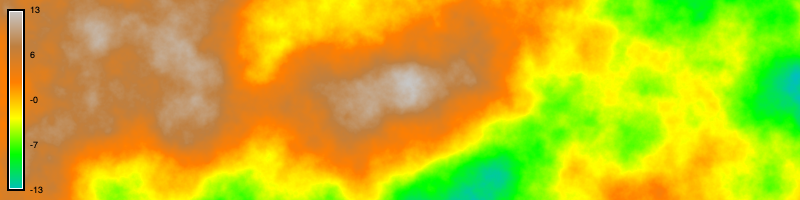
<figcaption aria-hidden="true">Mountains</figcaption>
</figure>

## Functions

Map algebra has arithmetic functions as well as operators. Let’s take
the absolute value of our terrain to model river valleys winding through
our fractal mountains. In the raster map calculator
[r.mapcalc](https://grass.osgeo.org/grass-stable/manuals/r.mapcalc.html),
write the expression `elevation = abs(elevation)` to create a new
elevation raster equal to absolute value of the fractal surface. Because
our fractal terrain has values both below and above mean sea level,
i.e. zero, taking its absolute value will raise the low-lying valleys
into mountains. The elevation gradient close to zero will become river
valleys at the feet of the mountains. Use
[r.colors](https://grass.osgeo.org/grass-stable/manuals/r.colors.html)
to assign a color gradient to the elevation raster, ensuring that the
gradient fits rescaled elevation range of the raster.

In [5]:
# Map algebra
gs.mapcalc("elevation = abs(elevation)", overwrite=True)
gs.run_command("r.colors", map="elevation", color="elevation")

# Visualize
m.d_rast(map="elevation")
m.d_legend(raster="elevation", at=(5, 95, 1, 3))
m.show()

<figure>
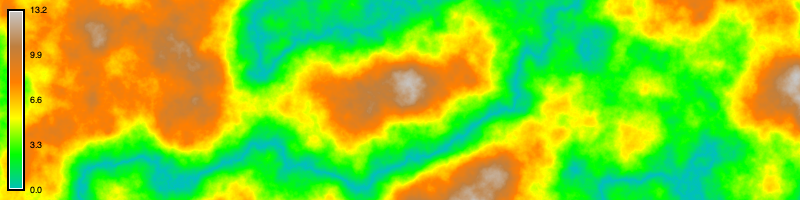
<figcaption aria-hidden="true">Valleys</figcaption>
</figure>

# Neighborhoods

Let’s try a focal map algebra operation that acts on a neighborhood of
cells. The easiest way to do this is with nearest neighbors analysis
with
[r.neighbors](https://grass.osgeo.org/grass-stable/manuals/r.neighbors.html),
but it can also be done by [defining a moving
window](https://grasswiki.osgeo.org/wiki/GRASS_Python_Scripting_Library#r.mapcalc_example:_defining_a_moving_window)
for r.mapcalc. Use
[r.neighbors](https://grass.osgeo.org/grass-stable/manuals/r.neighbors.html)
to smooth the elevation raster, simulating the weathering of old
mountains. Set the input raster to our `elevation` raster, the output
raster to a new `weathering` raster, the neighborhood size to `9`, the
method to `average`, and flag `c` for a circular neighborhood. This will
create a circular moving window nine pixels wide that moves from cell to
cell across the raster. The moving window will calculate the average
value of the neighborhood of cells around each cell, smoothing the
raster. The size of the moving window, which must be an odd integer
value of three or greater, determines the degree of smoothing.

In [6]:
# Nearest neighbors
gs.run_command(
  "r.neighbors",
  input="elevation",
  output="weathering",
  size=9,
  method="average",
  flags="c",
  overwrite=True
  )

# Visualize
m.d_rast(map="weathering")
m.d_legend(raster="weathering", at=(5, 95, 1, 3))
m.show()

<figure>
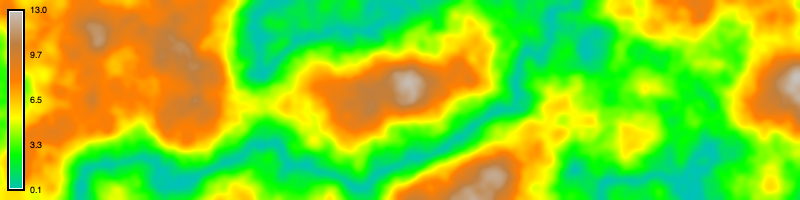
<figcaption aria-hidden="true">Weathering</figcaption>
</figure>

# Randomness

We can use map algebra to inject randomness in our raster data. Use the
raster map calculator
[r.mapcalc](https://grass.osgeo.org/grass-stable/manuals/r.mapcalc.html)
to generate a random surface, simulating the height of the forest
canopy. Write the expression `random = rand(0.0, 10.0)` to create a new
random raster with random floating point values between zero and ten
assigned to each cell. For easily reproducible results, set a fixed seed
for the pseudo-random number generator.

In [7]:
# Generate random surface
gs.mapcalc("random = rand(0.0, 10.0)", seed=0)

# Visualize
m.d_rast(map="random")
m.d_legend(raster="random", at=(5, 95, 1, 3))
m.show()

<figure>
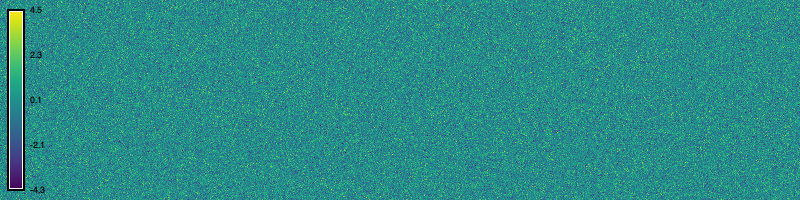
<figcaption aria-hidden="true">Randomness</figcaption>
</figure>

Use the raster map calculator
[r.mapcalc](https://grass.osgeo.org/grass-stable/manuals/r.mapcalc.html)
to add the height of the forest canopy to the elevation gradient,
simulating the forested terrain. Write the expression
`forest = elevation + random` to create a new raster equal to the sum of
the elevation raster and the random surface. This is a local map algebra
operation using basic arithmetic between two rasters.

In [8]:
# Map algebra
gs.mapcalc("forest = elevation + random")

# Visualize
m.d_rast(map="forest")
m.d_legend(raster="forest", at=(5, 95, 1, 3))
m.show()

<figure>
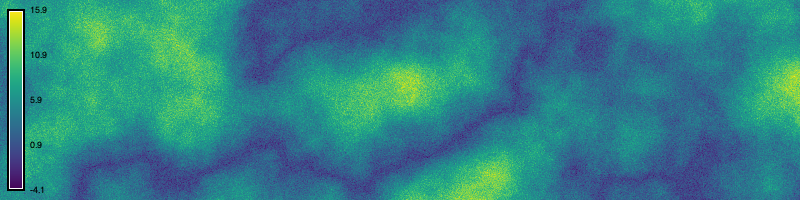
<figcaption aria-hidden="true">Forests</figcaption>
</figure>

# Logic

We can use logical statements in map algebra that test whether given
conditions are true or false. In the raster map calculator, we can use
the function `if(x,a,b)` to evaluate **if** cells meet condition `x`,
**then** do `a`, **else** do `b`. In this tutorial, we will use
`if then else` statements to model plateaus and rivers.

<table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<tbody>
<tr>
<td style="text-align: center;"><div width="100.0%"
data-layout-align="center">
<table>
<thead>
<tr>
<th>Logical Operator</th>
<th>Syntax</th>
</tr>
</thead>
<tbody>
<tr>
<td>Greater than</td>
<td><code>&gt;</code></td>
</tr>
<tr>
<td>Less than</td>
<td><code>&lt;</code></td>
</tr>
<tr>
<td>Greater than or equal</td>
<td><code>&gt;=</code></td>
</tr>
<tr>
<td>Less than or equal</td>
<td><code>&lt;=</code></td>
</tr>
<tr>
<td>Equal</td>
<td><code>=</code></td>
</tr>
<tr>
<td>Not equal</td>
<td><code>!=</code></td>
</tr>
<tr>
<td>Logical and</td>
<td><code>&amp;&amp;</code></td>
</tr>
<tr>
<td>Logical or</td>
<td><code>||</code></td>
</tr>
</tbody>
</table>
</div></td>
</tr>
</tbody>
</table>

Table 3: Logical operators

## If statements

Let’s use logic in map algebra to transform the mountain peaks into
plateaus. First use the raster map calculator
[r.mapcalc](https://grass.osgeo.org/grass-stable/manuals/r.mapcalc.html)
with an `if` statement to find all cells with an elevation above thirty.
Write the expression `plateaus = if(elevation > 30)`. Simple if
statements with the form `if(x)` - where `x` is an equality or
inequality statement - return a raster with ones where the statement is
true and zeros where it is false. So this expression will return a new
raster with ones where the plateaus will be and zeros elsewhere. This is
a zonal map algebra operation using logic to isolate a zone of cells.

In [9]:
# Map algebra
gs.mapcalc("plateaus = if(elevation > 30)")

# Visualize
m.d_rast(map="plateaus")
m.show()

<figure>
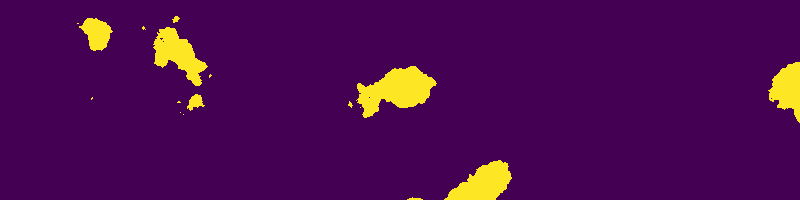
<figcaption aria-hidden="true">Zones</figcaption>
</figure>

## If then else statements

Now use the raster map calculator
[r.mapcalc](https://grass.osgeo.org/grass-stable/manuals/r.mapcalc.html)
to model the plateaus using an `if then else` statement. In map algebra,
the syntax for these logical statements is `if(x, a, b)` where if the
relational statement `x` is true, then do `a`, else do `b`. Write the
expression `elevation = if(elevation > 30, 30, elevation)`. All cells
with elevation values greater than 30 will be assigned a value of 30,  
while all other cells will keep their original values. This will flatten
all of the mountain peaks above the threshold of 30, forming plateaus.

In [10]:
# Map algebra
gs.mapcalc("elevation = if(elevation > 30, 30, elevation)", overwrite=True)
gs.run_command("r.colors", map="elevation", color="elevation")

# Visualize
m.d_rast(map="elevation")
m.d_legend(raster="elevation", at=(5, 95, 1, 3))
m.show()

<figure>
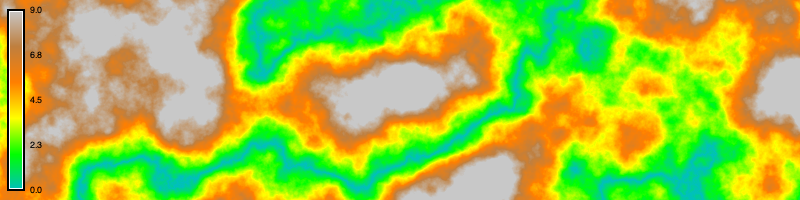
<figcaption aria-hidden="true">Plateaus</figcaption>
</figure>

## Complex expressions

Use map algebra to model a river that fills the valleys. With the raster
map calculator
[r.mapcalc](https://grass.osgeo.org/grass-stable/manuals/r.mapcalc.html)
write the expression `river = if(elevation < 6, 6 - elevation, null())`
to simulate the depth of the river. This is a more complicated map
algebra expression that combines logic with an `if then else` statement,
arithmetical operations between rasters, and the internal variable
`null()`. If cells in the elevation raster have values less than six,
then they will be assigned the difference between six and the elevation
raster, else they will be assigned null values. Then use
[r.colors](https://grass.osgeo.org/grass-stable/manuals/r.colors.html)
to assign the `water` color gradient to the river raster. The null cells
will be transparent, so the river depth raster can be layered over the
elevation raster.

In [11]:
# Map algebra
gs.mapcalc("rivers = if(elevation < 6, 6 - elevation, null())")
gs.run_command("r.colors", map="rivers", color="water")

# Visualize
m.d_rast(map="elevation")
m.d_rast(map="rivers")
m.d_legend(raster="rivers", at=(5, 95, 1, 3))
m.show()

<figure>
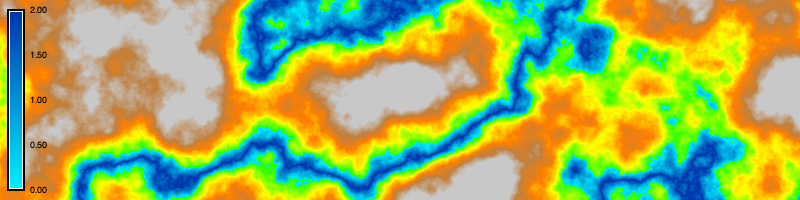
<figcaption aria-hidden="true">Rivers</figcaption>
</figure>